# Strategy Return Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import bt
import talib

In [20]:
stock_data = pd.read_csv("../../assets/GOOG.csv", index_col='Date', parse_dates=True)

In [21]:
price_data = stock_data[['Close']]

## EMA-based strategy

In [40]:
def signal_strategy(price_data, period, name):
    # Calculate SMA
    sma = price_data.rolling(period).mean()
    # Define the signal-based Strategy
    bt_strategy = bt.Strategy(name, 
                              [bt.algos.SelectWhere(price_data>sma),
                               bt.algos.WeighEqually(),
                               bt.algos.Rebalance()])
    # Return the backtest
    return bt.Backtest(bt_strategy, price_data)

## SMA-based strategy

In [41]:
# Create signal strategy backtest
sma10 = signal_strategy(price_data, period=10, name='SMA10')
sma30 = signal_strategy(price_data, period=30, name='SMA30')
sma50 = signal_strategy(price_data, period=50, name='SMA50')

## Run all backtests and plot the resutls

In [46]:
bt_results = bt.run(sma10, sma30, sma50)

100%|██████████| 3/3 [00:00<00:00, 77195.78it/s]


## Obtain all backtest stats

In [57]:
resInfo = bt_results.stats

## Get daily, monthly, and yearly returns

In [79]:
print(resInfo.iloc[resInfo.index.get_loc('daily_mean'),:])
print("-----------------")
print(resInfo.iloc[resInfo.index.get_loc('monthly_mean'),:])
print("-----------------")
print(resInfo.iloc[resInfo.index.get_loc('yearly_mean'),:])

SMA10   -0.003472
SMA30    0.130207
SMA50    0.128415
Name: daily_mean, dtype: object
-----------------
SMA10   -0.005605
SMA30    0.126312
SMA50    0.124093
Name: monthly_mean, dtype: object
-----------------
SMA10    -0.01523
SMA30    0.131957
SMA50    0.123829
Name: yearly_mean, dtype: object


## Get the compound annual growth rate

In [84]:
print('Compound annual growth rate:\n')

print(resInfo.iloc[resInfo.index.get_loc('cagr'),:])


Compound annual growth rate:

SMA10   -0.017877
SMA30    0.120732
SMA50    0.119737
Name: cagr, dtype: object


## Plot the daily return histogram

<Figure size 640x480 with 0 Axes>

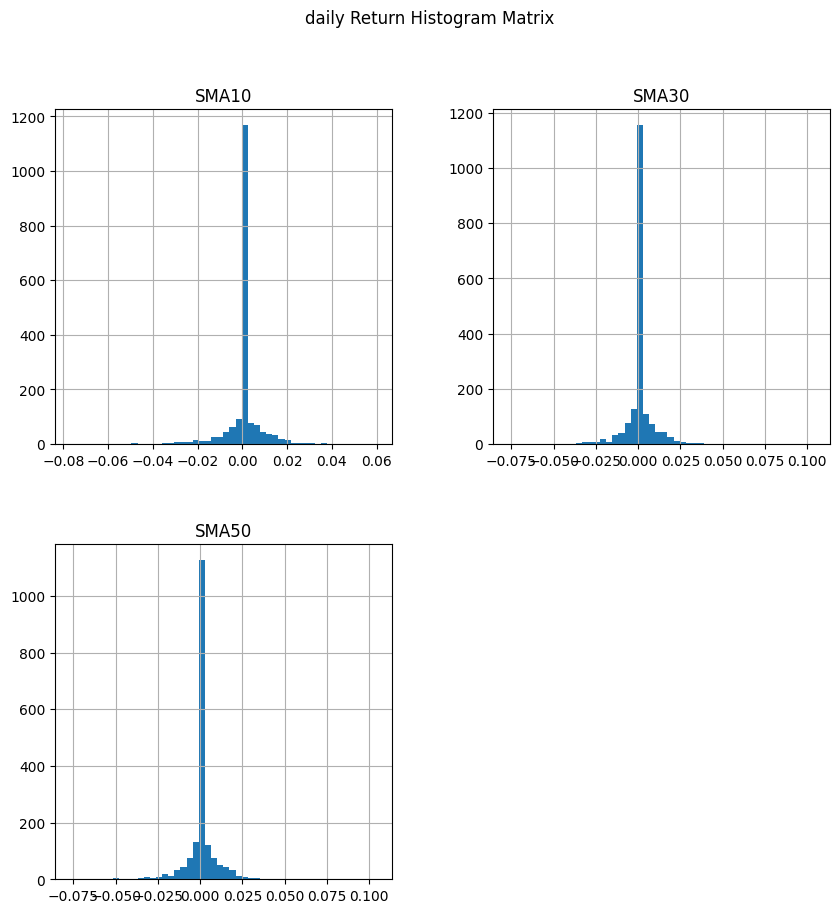

In [55]:
bt_results.plot_histograms(bins=50, freq = 'd')
plt.show()

## Plot the weekly return histogram

/Users/aymanelsayeed/PycharmProjects/financial-trading/.venv/lib/python3.12/site-packages/ffn/core.py:1075: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  return self.prices.asfreq(freq, "ffill")


<Figure size 640x480 with 0 Axes>

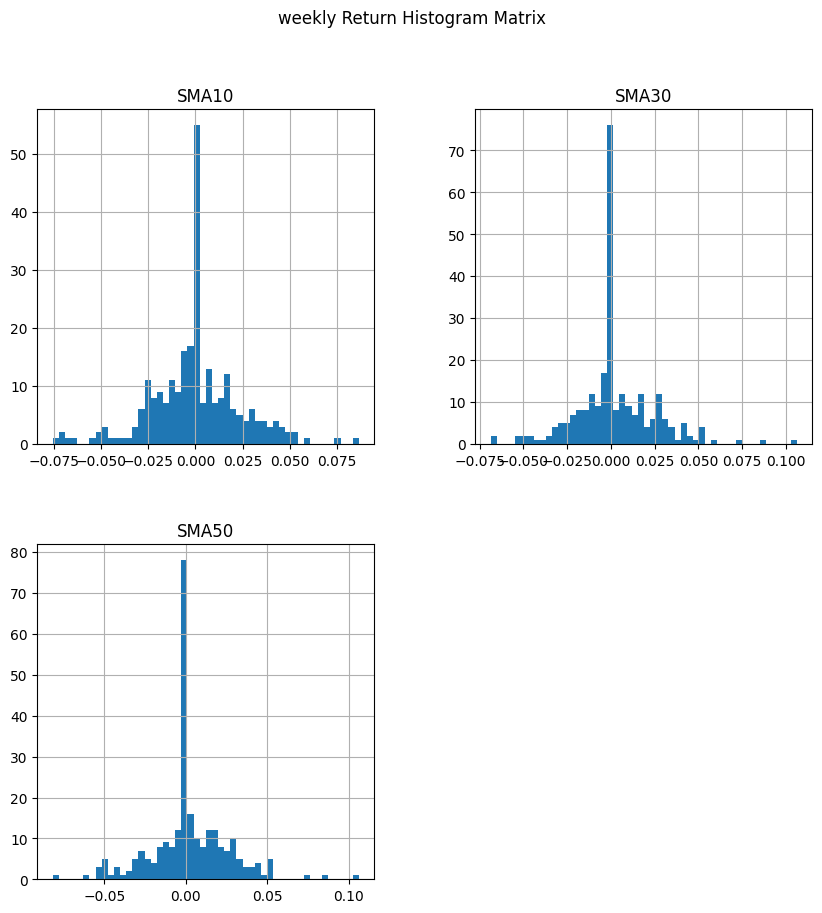

In [54]:
bt_results.plot_histograms(bins=50, freq = 'w')
plt.show()

## Plot the monthly return histogram

/Users/aymanelsayeed/PycharmProjects/financial-trading/.venv/lib/python3.12/site-packages/ffn/core.py:1075: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  return self.prices.asfreq(freq, "ffill")


<Figure size 640x480 with 0 Axes>

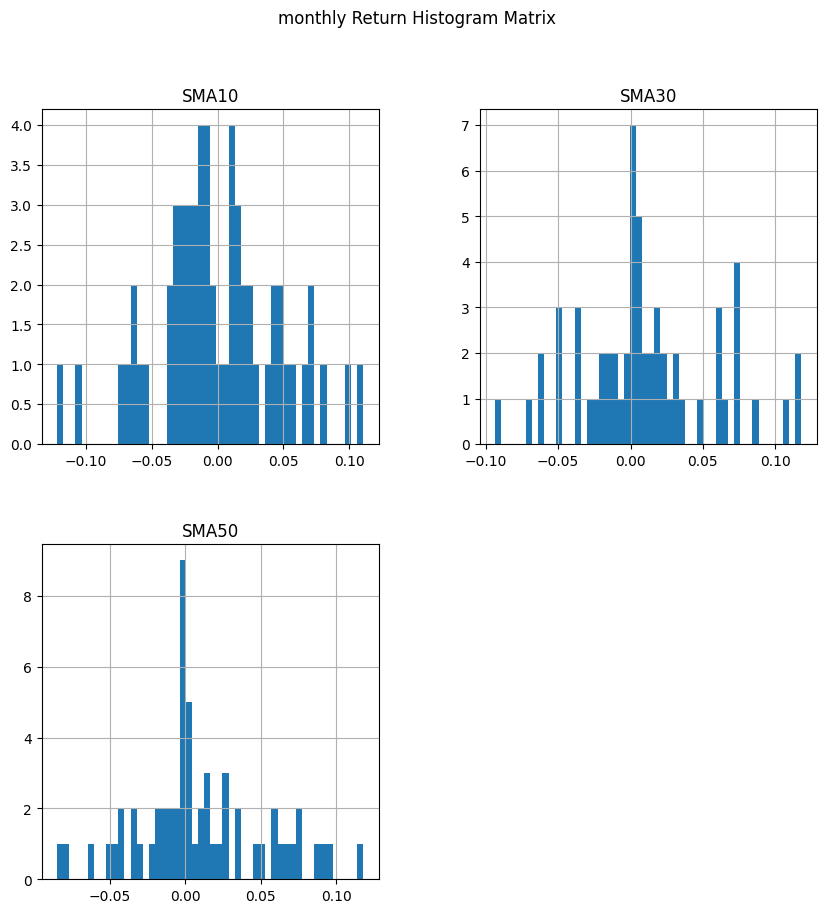

In [53]:
bt_results.plot_histograms(bins=50, freq = 'm')
plt.show()

## Plot the backtest result

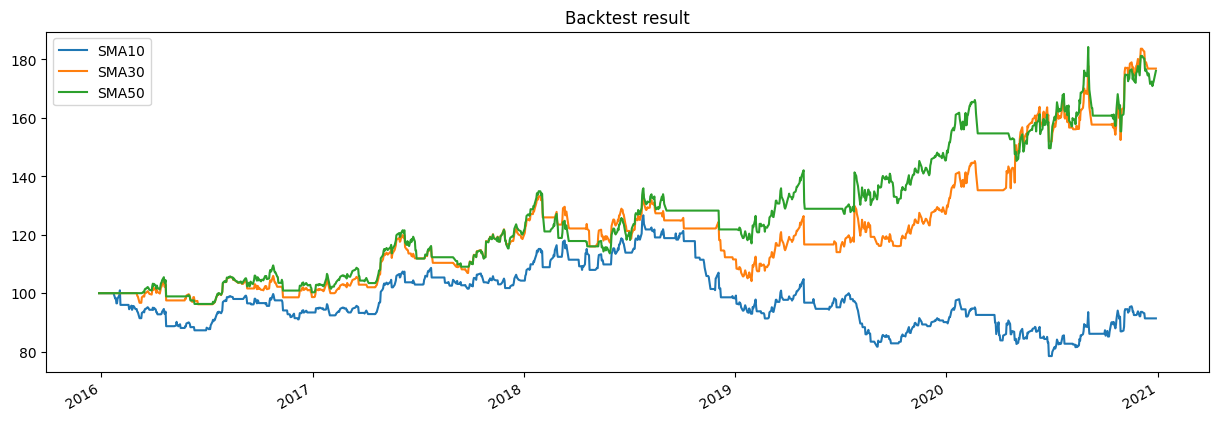

In [51]:
bt_results.plot(title='Backtest result')
plt.show()

## Get the lookback returns

In [50]:
lookback_returns = bt_results.display_lookback_returns()
print(lookback_returns)

        SMA10   SMA30   SMA50
mtd    -0.78%  -0.04%   0.87%
3m      6.13%  12.16%   9.53%
6m     16.44%  16.40%  17.70%
ytd     1.42%  39.06%  21.03%
1y      1.42%  37.53%  19.70%
3y     -4.31%  14.21%  13.55%
5y     -1.79%  12.07%  11.97%
10y      nan%    nan%    nan%
incep  -1.79%  12.07%  11.97%
